In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Cargando Datos

In [22]:
import zipfile
with zipfile.ZipFile('valoracion_aerolineas.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dataset')

In [23]:
# Cargando el dataset
df_train = pd.read_csv('/content/dataset/train.csv')
df_test = pd.read_csv('/content/dataset/test.csv')
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Visualización de los datos ya cargados

In [24]:
# Mostrando las columnas del dataset
print(df_train.columns)
print(df_test.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')
Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'D

In [25]:
# Limpiamos los datos
df_train = df_train.dropna()
df_test = df_test.dropna()

# Obtiene el número de filas y columnas
rows_df_train, columns_df_train = df_train.shape
print(f'El archivo CSV de entrenamiento tiene {rows_df_train} filas y {columns_df_train} columnas.')

rows_df_test, columns_df_test = df_test.shape
print(f'El archivo CSV de pruebas tiene {rows_df_test} filas y {columns_df_test} columnas.')


El archivo CSV de entrenamiento tiene 103594 filas y 25 columnas.
El archivo CSV de pruebas tiene 25893 filas y 25 columnas.


## Selección de columnas para trabajar

In [26]:
data = df_train[['Gender', 'Customer Type', 'Age', 'Type of Travel','Class','Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking','Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service','Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes','satisfaction']]
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [27]:
data.info

<bound method DataFrame.info of         Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                

In [28]:
#Descripción de los datos de cada columna
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Funciones comunes para graficar

In [29]:
# Gráfico de torta
def pie_chart(data_column, axes):
    column_count = data_column.value_counts()
    axes.pie(column_count, labels=column_count.index, autopct='%1.0f%%', colors=sns.color_palette('viridis', len(column_count)))
    axes.axis('equal')

In [30]:
def bar_chart(df, column, hue, xlabel, title, axes):
    sns.countplot(ax=axes, data=df, x=column, hue=hue, palette='viridis')
    axes.set_xlabel(xlabel)
    axes.set_ylabel("Cantidad")
    axes.set_title(title)

# Análisis Univariable


#### 1. Columna: Género

In [31]:
gender = data["Gender"]
gender.describe()

count     103594
unique         2
top       Female
freq       52576
Name: Gender, dtype: object

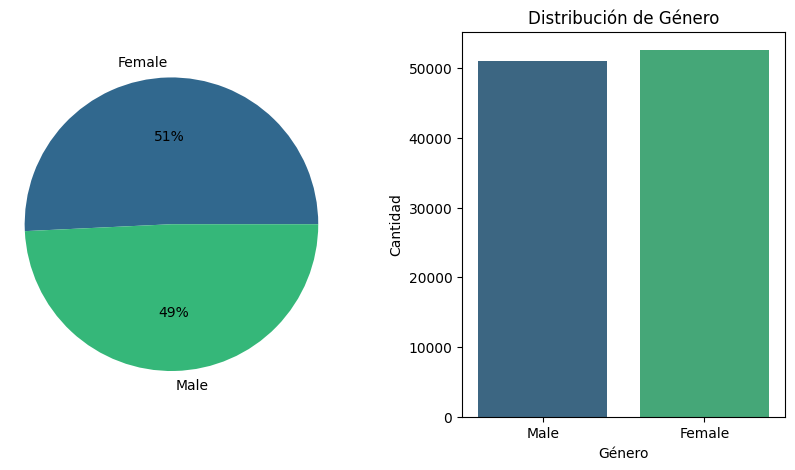

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data['Gender'], axes[0])
bar_chart(data,'Gender',data['Gender'],'Género', "Distribución de Género",axes[1])

plt.subplots_adjust(wspace=0.4)
plt.show()

#### 2. Columna: Tipo Cliente

In [33]:
customer_type = data["Customer Type"]
customer_type.describe()

count             103594
unique                 2
top       Loyal Customer
freq               84662
Name: Customer Type, dtype: object

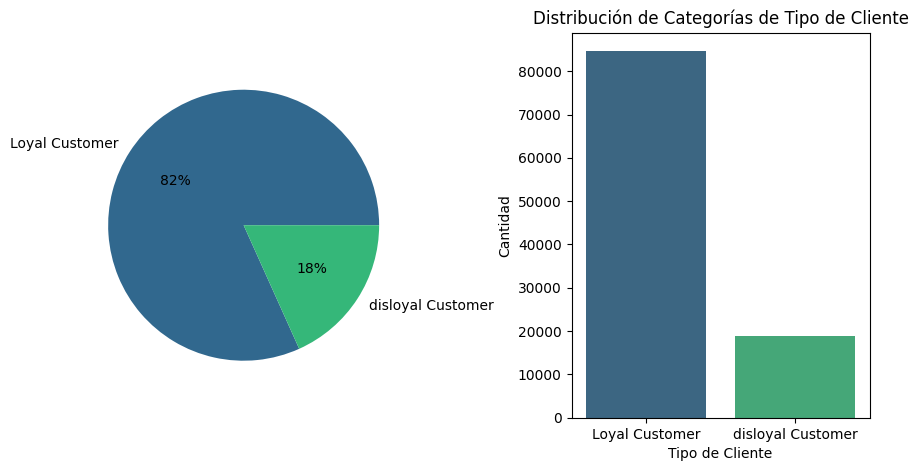

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data["Customer Type"], axes[0])
bar_chart(data,"Customer Type",data["Customer Type"],'Tipo de Cliente', "Distribución de Categorías de Tipo de Cliente",axes[1])

plt.subplots_adjust(wspace=0.6)
plt.show()

#### 3. Columna: Edad

In [35]:
age = data["Age"]
age.describe()

count    103594.000000
mean         39.380466
std          15.113125
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

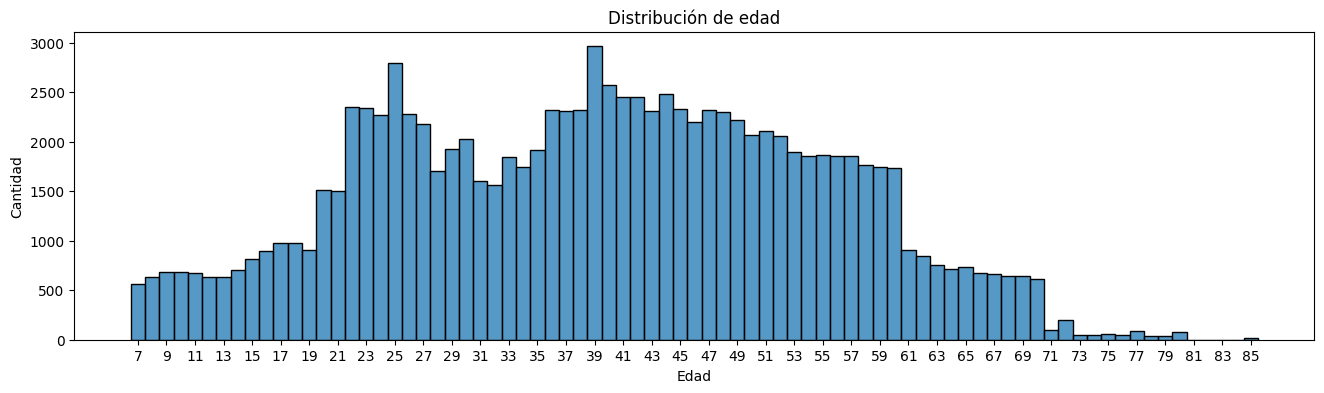

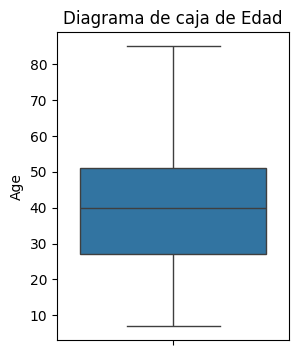

In [36]:
#Histograma de la columna edad
plt.figure(figsize=(16, 4))
sns.histplot(data=data, x='Age', discrete=True)
plt.title("Distribución de edad")
plt.xlabel("Edad")
plt.xticks(range(int(data['Age'].min()), int(data['Age'].max())+1, 2))
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(age);
plt.title("Diagrama de caja de Edad");
plt.show()

In [37]:
#Segmentando la edad en categorías (niño, adolescente, joven, adulto, persona mayor)
bins = [5, 11, 18, 26, 39, 49, 59, 120]
categories = {
    'Niño':'(6-11)',
    'Adolescencia':'(12-18)',
    'Joven':'(19-26)',
    'Adulto Joven':'(27-39)',
    'Adulto Medio':'(40-49)',
    'Adulto Mayor':'(50-59)',
    'Persona Mayor':'(>= 60)'
}
extended_data = pd.DataFrame(data)

# Crear la nueva columna
extended_data['Age Category'] = pd.cut(extended_data['Age'], bins=bins, labels=categories.keys(), right=True)
#extended_data.head()

In [38]:
#Visualizando características de la nueva columna
age_category = extended_data["Age Category"]
age_category.describe()

count           103594
unique               7
top       Adulto Joven
freq             26402
Name: Age Category, dtype: object

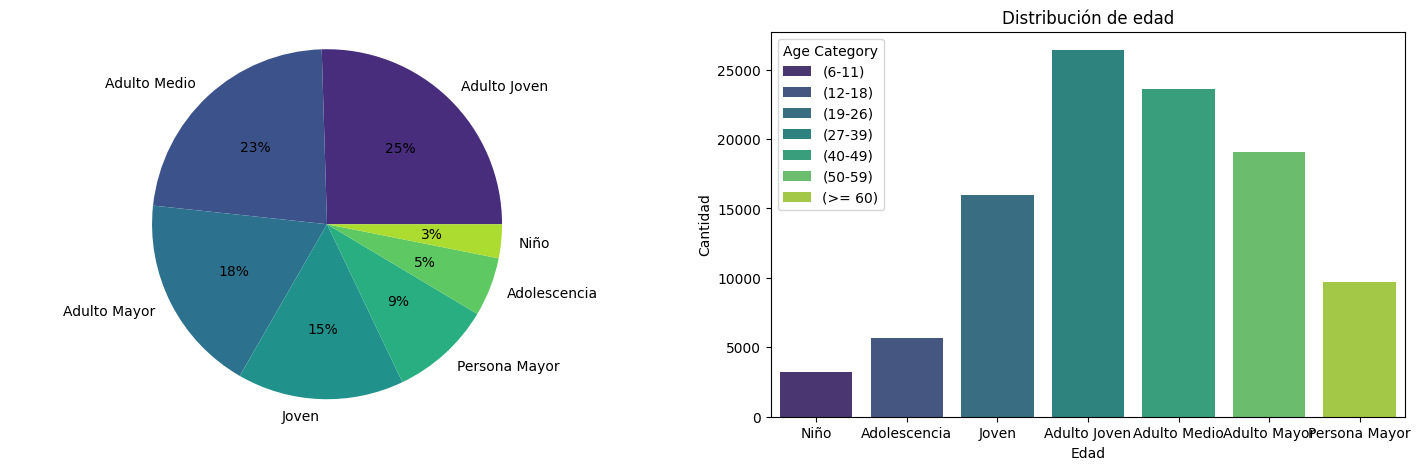

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

pie_chart(extended_data['Age Category'], axes[0])
bar_chart(extended_data,'Age Category',extended_data['Age Category'].map(categories),'Edad',"Distribución de edad",axes[1])

plt.show()

In [40]:
# Análisis de Tendencia Central para la Edad

print(f'Media: {age.mean()}')
print(f'Mediana: {age.median()}')
print(f'Moda: {age.mode()}')

Media: 39.380466050157345
Mediana: 40.0
Moda: 0    39
Name: Age, dtype: int64


- Es una columna con valores continuos
- La columna maneja valores desde los 7 hasta los 85 años.
- La media de edad es 39 años
- La desviación estándar es: 15,11
- Debido a que las métricas de tendencia central son similares; podemos afirmar que la edad de los usuarios sigue una distribución normal. No existe sesgo, por lo tanto estos datos son simétricos.

- Se creó una columna extra en la que se categorizan las edades de acuerod a un rango de valores establecido

#### 4. Columna: Tipo de Vuelo

In [41]:
type_travel = data["Type of Travel"]
type_travel.describe()

count              103594
unique                  2
top       Business travel
freq                71465
Name: Type of Travel, dtype: object

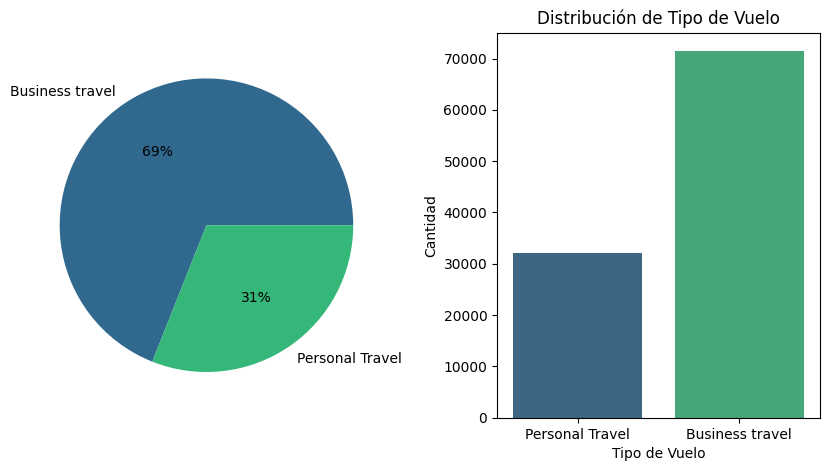

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data["Type of Travel"], axes[0])
bar_chart(data,'Type of Travel',data['Type of Travel'],'Tipo de Vuelo',"Distribución de Tipo de Vuelo",axes[1])

plt.subplots_adjust(wspace=0.4)
plt.show()

#### 5. Columna: Class

In [43]:
class_column = data["Class"]
class_column.describe()

count       103594
unique           3
top       Business
freq         49533
Name: Class, dtype: object

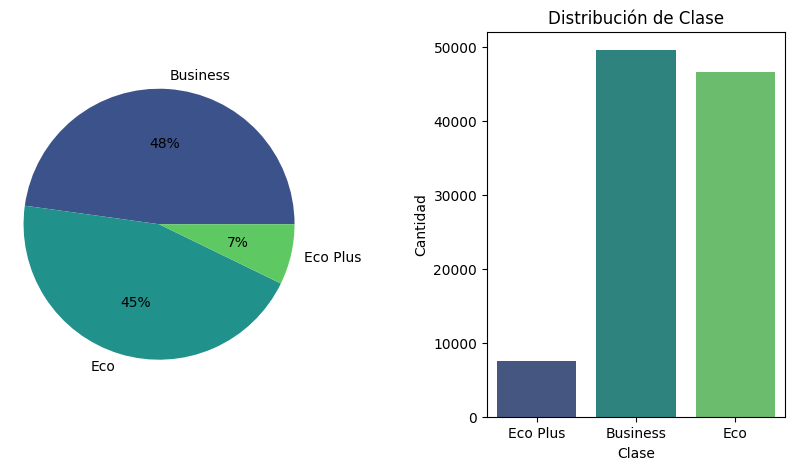

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data["Class"], axes[0])
bar_chart(data,'Class',data["Class"],'Clase',"Distribución de Clase",axes[1])

plt.subplots_adjust(wspace=0.6)
plt.show()

#### 6. Columna: Distancia de Viaje

In [45]:
flight_distance = data["Flight Distance"]
flight_distance.describe()

count    103594.000000
mean       1189.325202
std         997.297235
min          31.000000
25%         414.000000
50%         842.000000
75%        1743.000000
max        4983.000000
Name: Flight Distance, dtype: float64

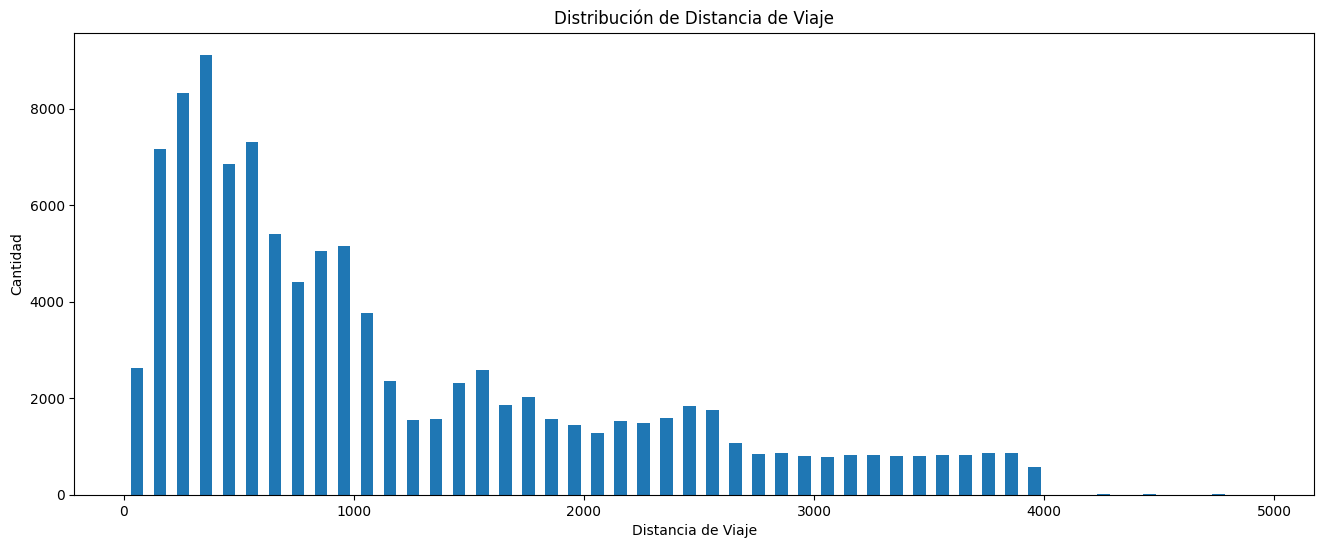

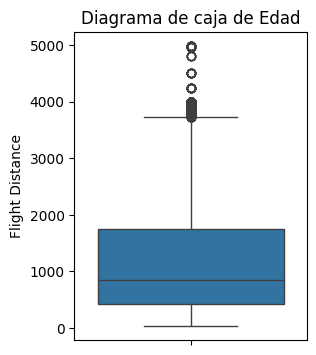

In [46]:
#Histograma de la columna edad
bins = list(range(30,5000,100))
plt.figure(figsize=(16, 6))
flight_distance.plot(kind="hist", width=55,bins=bins);
plt.title("Distribución de Distancia de Viaje")
plt.xlabel("Distancia de Viaje")
plt.ylabel("Cantidad")
plt.show()

#Gráfico de caja de la columna edad
fig, ax = plt.subplots(figsize=(3, 4)) 
sns.boxplot(flight_distance);
plt.title("Diagrama de caja de Edad");
plt.show()

In [47]:
print(f'Media: {flight_distance.mean()}')
print(f'Mediana: {flight_distance.median()}')
print(f'Moda: {flight_distance.mode()}')

Media: 1189.3252022317895
Mediana: 842.0
Moda: 0    337
Name: Flight Distance, dtype: int64


In [48]:
customer_type = data["Customer Type"]
customer_type.describe()

count             103594
unique                 2
top       Loyal Customer
freq               84662
Name: Customer Type, dtype: object

In [49]:
data_sat = df_train[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness']]
data_sat

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,2,1,2,3,2,2,2,2,3,1,4,2,3,2
103900,4,4,4,4,2,4,5,5,5,5,5,5,5,4
103901,1,1,1,3,4,1,5,4,3,2,4,5,5,4
103902,1,1,1,5,1,1,1,1,4,5,1,5,4,1


In [50]:
data['satisfaction']

0         neutral or dissatisfied
1         neutral or dissatisfied
2                       satisfied
3         neutral or dissatisfied
4                       satisfied
                   ...           
103899    neutral or dissatisfied
103900                  satisfied
103901    neutral or dissatisfied
103902    neutral or dissatisfied
103903    neutral or dissatisfied
Name: satisfaction, Length: 103594, dtype: object

# Pregunta 1: ¿Cuál es el nivel general de satisfacción de los pasajeros?, ¿cuáles son los porcentajes?

El nivel general de satisfacción nos dice que la mayoría de los pasajeros encuestados tienes una posición neutral o de insatisfacción con los diferentes servicios que propone la aerolinea, sin embargo la diferencia con el nivel de satisfacción no es muy amplio, ya que los valores correspondientes son de 57% de neutral o insatisfacción contra un 43% de pasajeros satisfechos.

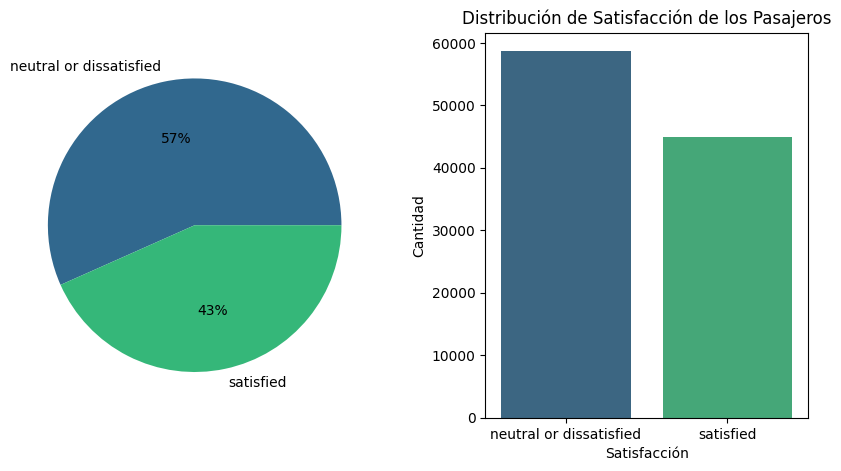

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data['satisfaction'], axes[0])
bar_chart(data,'satisfaction',data['satisfaction'],'Satisfacción', "Distribución de Satisfacción de los Pasajeros",axes[1])

plt.subplots_adjust(wspace=0.4)
plt.show()

# Pregunta 2: ¿Cómo varía la satisfacción según el género de los pasajeros?

- Inicialmente se parte con una mayor cantidad de personas encuestados del género femenino por una mínima diferencia: 51% mujeres y 49% hombres.
- De acuerdo a esto se procede a trabajar con valores porcentuales para la comparación entre la satisfacción y el género.
- Se observa que el nivel de satisfacción de ambos géneros es minoritaria a compración de la opinión neutral o de insatisfacción.
- De acuerod a la compración entre ambos géneros la diferencia acerca de la opinión de satisfacción es del 1.22%, el cuál no se considera significativo. Si bien las mujeres tienden a estar más insatisfechas o neutrales que los hombres respecto al servicio de las aerolíneas, la diferencia es mínima, por lo que no se podría decir que la satisfacción varíe según el género del encuestado.

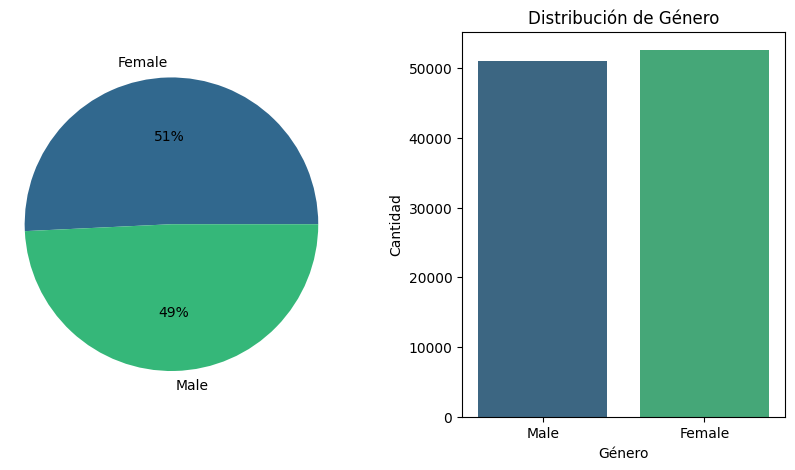

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data['Gender'], axes[0])
bar_chart(data,'Gender',data['Gender'],'Género', "Distribución de Género",axes[1])

plt.subplots_adjust(wspace=0.4)
plt.show()

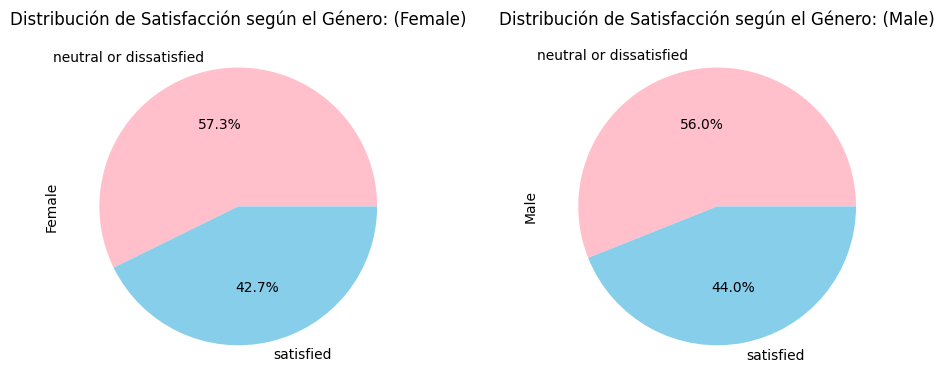

In [53]:
satisfaction_gender_df = data.groupby(['Gender', 'satisfaction']).size().unstack()
fig, axes = plt.subplots(1, len(satisfaction_gender_df), figsize=(10, 4))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender_df.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de Satisfacción según el Género: ({gender})')

plt.tight_layout()
plt.show()

In [54]:
female_satisfaction = satisfaction_gender_df.loc['Female', 'satisfied']*100/(satisfaction_gender_df.loc['Female'].sum())
male_satisfaction = satisfaction_gender_df.loc['Male', 'satisfied']*100/(satisfaction_gender_df.loc['Male'].sum())
difference_gender_satisfaction = abs(female_satisfaction - male_satisfaction)
difference_gender_satisfaction

1.2247254987659986

# Pregunta 3: ¿Hay diferencias significativas según el grupo de edad?

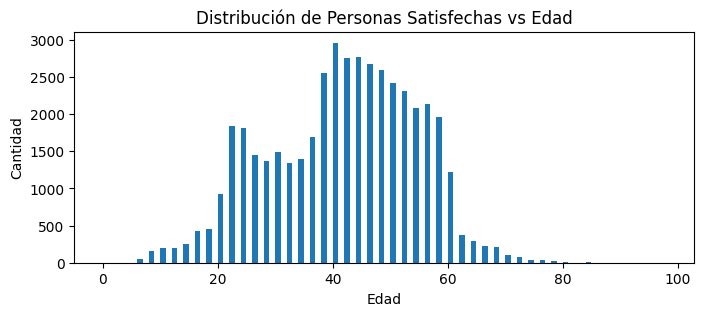

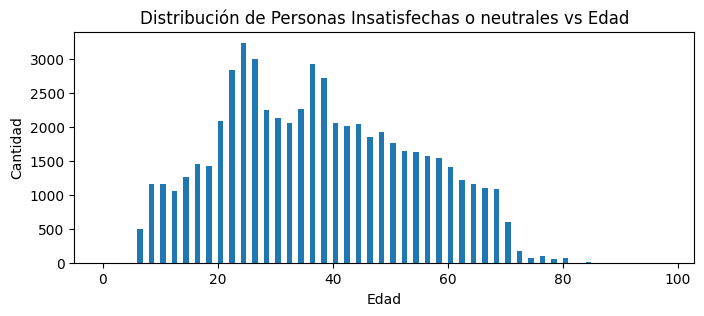

In [55]:
satisfied_group = data[data['satisfaction'] == 'satisfied']['Age']
neutral_group = data[data['satisfaction'] == 'neutral or dissatisfied']['Age']

bins = list(range(0,100,2))

#Histograma de personas satisfechos según la edad
plt.figure(figsize=(8, 3))
satisfied_group.plot(kind="hist", width=1, bins=bins);
plt.title("Distribución de Personas Satisfechas vs Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

#Histograma de personas satisfechos según la edad
plt.figure(figsize=(8, 3))
neutral_group.plot(kind="hist", width=1, bins=bins);
plt.title("Distribución de Personas Insatisfechas o neutrales vs Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

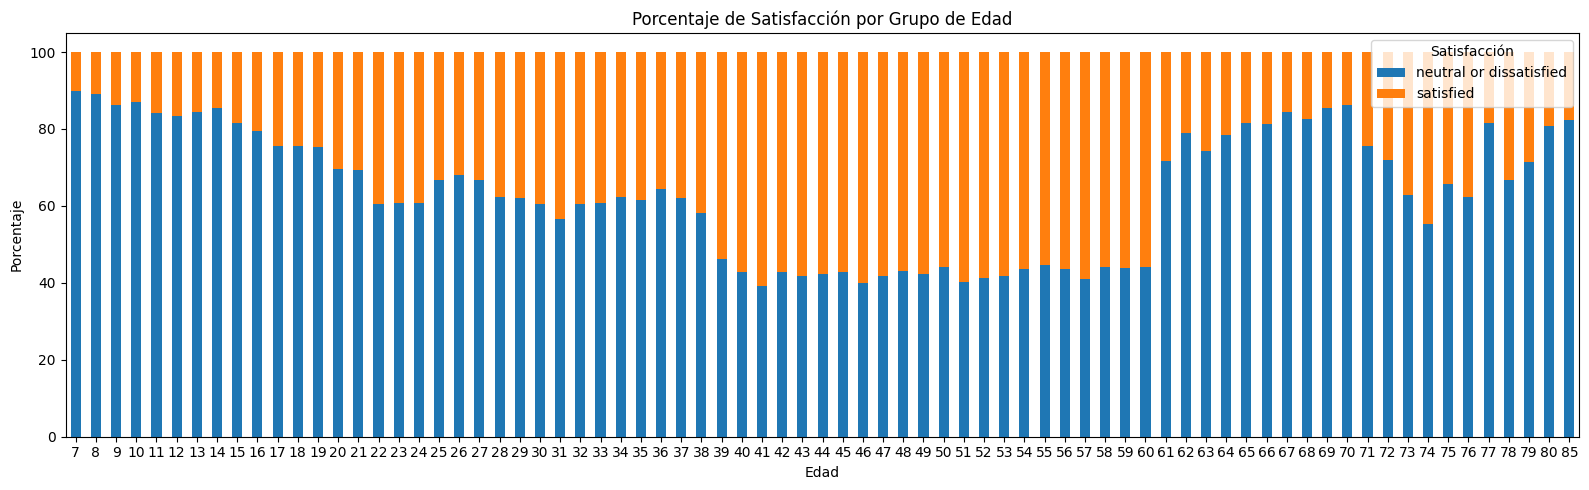

In [56]:
age_groups = data.groupby(['Age', 'satisfaction']).size().unstack()
total_per_age = age_groups.sum(axis=1)
percentage_age_groups = age_groups.div(total_per_age, axis=0) * 100

percentage_age_groups.plot(kind='bar', stacked=True, figsize=(16, 5))
plt.xlabel('Edad')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Satisfacción por Grupo de Edad')
plt.legend(title='Satisfacción')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import ttest_ind

t_test_result = ttest_ind(satisfied_group, neutral_group)
alpha = 0.05
if t_test_result.pvalue <= alpha:
    print('Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).')
else:
    print('No hay diferencias significativas en la satisfacción según el grupo de edad (no rechazamos la hipótesis nula).')

Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).


C:\Users\ddcre\AppData\Local\Temp\ipykernel_17472\1946686275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = extended_data.groupby(['Age Category','satisfaction']).size().unstack()


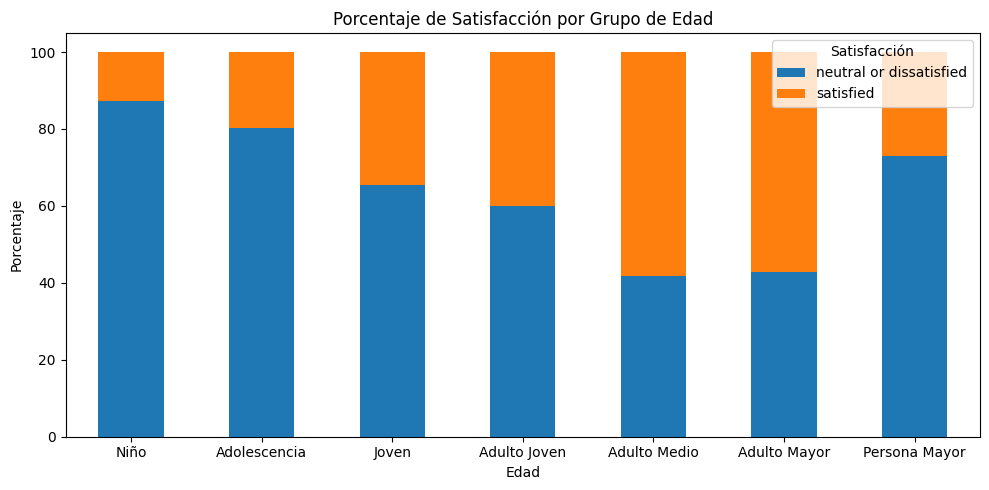

In [58]:
age_groups = extended_data.groupby(['Age Category','satisfaction']).size().unstack()
total_per_age = age_groups.sum(axis=1)
percentage_age_groups = age_groups.div(total_per_age, axis=0) * 100

#Gráfico de barras apiladas
percentage_age_groups.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.xlabel('Edad')
plt.ylabel('Porcentaje')
plt.title('Porcentaje de Satisfacción por Grupo de Edad')
plt.legend(title='Satisfacción')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

In [59]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(extended_data['Age Category'], extended_data['satisfaction'])
contingency_table

satisfaction,neutral or dissatisfied,satisfied
Age Category,,
Niño,2822,415
Adolescencia,4522,1118
Joven,10420,5528
Adulto Joven,15822,10580
Adulto Medio,9897,13735
Adulto Mayor,8151,10902
Persona Mayor,7063,2619


In [60]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
if p_value < alpha:
    print("Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).")
else:
    print("No hay diferencias significativas en la satisfacción según el grupo de edad (no rechazamos la hipótesis nula).")

Hay diferencias significativas en la satisfacción según el grupo de edad (rechazamos la hipótesis nula).


# Pregunta 4: ¿Qué diferencias existen en la satisfacción entre clientes leales y no leales?

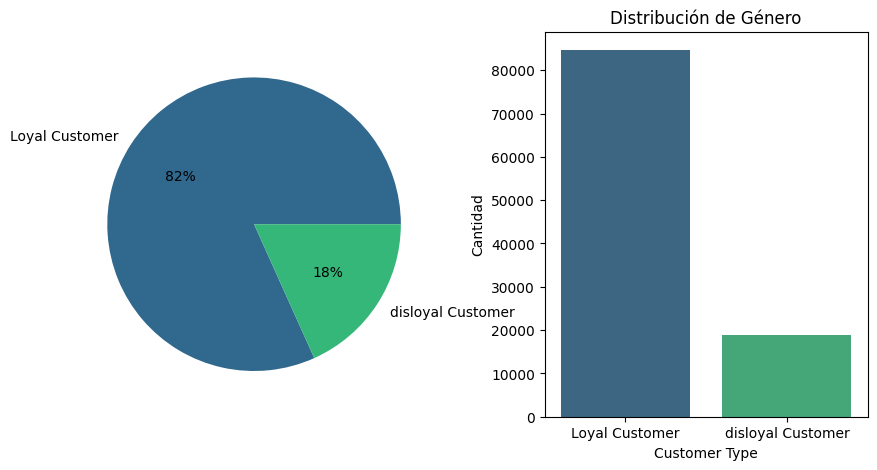

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

pie_chart(data['Customer Type'], axes[0])
bar_chart(data,'Customer Type',data['Customer Type'],'Customer Type', "Distribución de Género",axes[1])

plt.subplots_adjust(wspace=0.4)
plt.show()

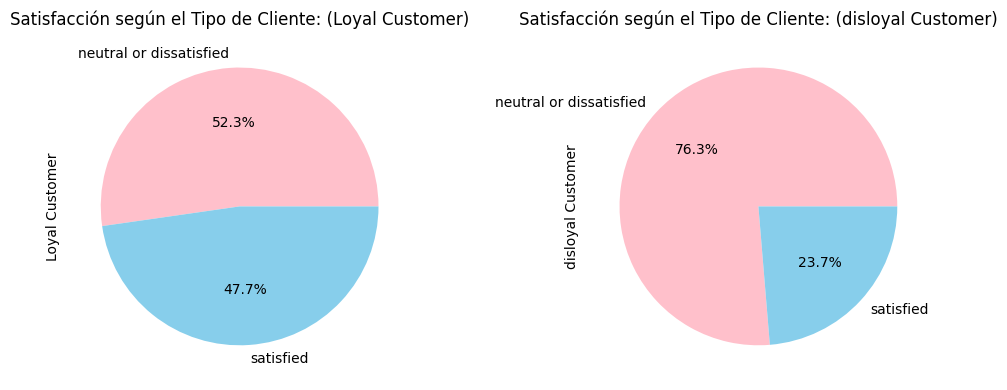

In [62]:
satisfaction_customer_type_df = data.groupby(['Customer Type', 'satisfaction']).size().unstack()
fig, axes = plt.subplots(1, len(satisfaction_customer_type_df), figsize=(10, 4))

colors = ["pink", "skyblue"]

for i, (customer_type, counts) in enumerate(satisfaction_customer_type_df.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Satisfacción según el Tipo de Cliente: ({customer_type})')

plt.tight_layout()
plt.show()

In [63]:
loyal_satisfaction = satisfaction_customer_type_df.loc['Loyal Customer', 'satisfied']*100/(satisfaction_customer_type_df.loc['Loyal Customer'].sum())
disloyal_satisfaction = satisfaction_customer_type_df.loc['disloyal Customer', 'satisfied']*100/(satisfaction_customer_type_df.loc['disloyal Customer'].sum())
difference_type_customer_satisfaction = abs(loyal_satisfaction - disloyal_satisfaction)
difference_type_customer_satisfaction

24.049754267504653

# Pregunta 5: ¿Cómo afecta el tipo de viaje (Personal vs. de Negocios) la satisfacción del pasajero?


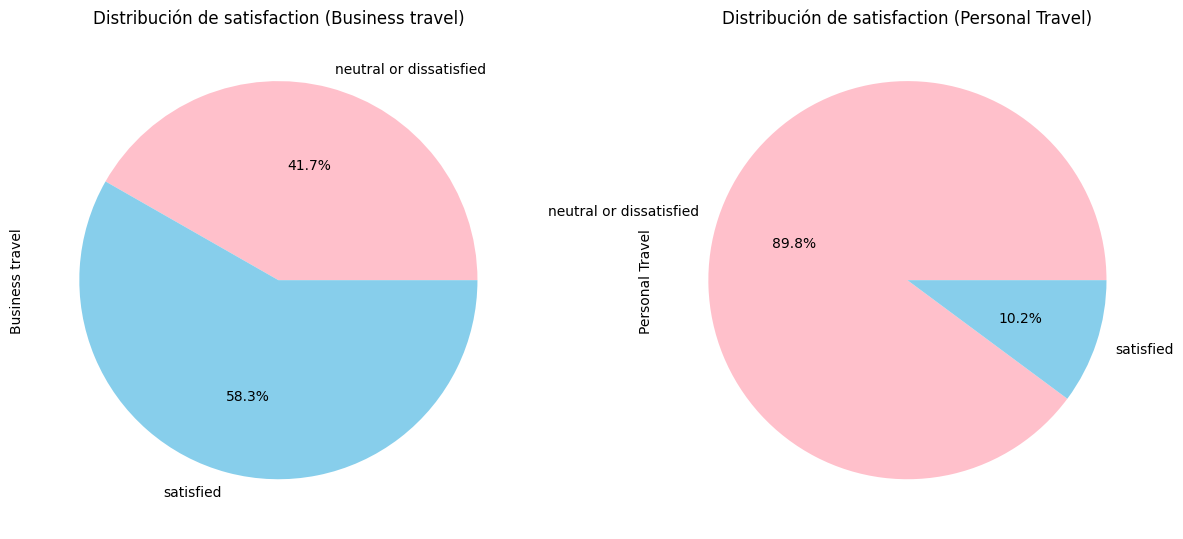

In [64]:
data['Type of Travel']
satisfaction_gender = data.groupby(['Type of Travel', 'satisfaction']).size().unstack()
satisfaction_gender
fig, axes = plt.subplots(1, len(satisfaction_gender), figsize=(12, 6))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de satisfaction ({gender})')

plt.tight_layout()
plt.show()

female_dissatisfaction = satisfaction_gender.loc['Personal Travel', 'satisfied']
male_dissatisfaction = satisfaction_gender.loc['Business travel', 'satisfied']
difference = female_dissatisfaction - male_dissatisfaction

# Pregunta 6: ¿Qué servicios influyen más en la satisfacción general del pasajero (wifi, entretenimiento a bordo, comodidad del asiento, etc.)?

In [65]:
df = pd.DataFrame(data)

# Seleccionar solo las columnas requeridas
selected_columns = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "satisfaction"
]

df_selected = df[selected_columns]

# Convertir la variable 'satisfaction' a valores numéricos
satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}
df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)

# Calcular la matriz de correlación
correlation_matrix = df_selected.corr()

# Correlación con la satisfacción del pasajero
satisfaction_correlation = correlation_matrix['satisfaction'].drop('satisfaction')

# Ordenar por valor absoluto de correlación
satisfaction_correlation = satisfaction_correlation.abs().sort_values(ascending=False)

print("Correlación con la satisfacción del pasajero:")
print(satisfaction_correlation)

Correlación con la satisfacción del pasajero:
Online boarding                      0.503447
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Ease of Online booking               0.171507
Departure/Arrival time convenient    0.051718
Gate location                        0.000449
Name: satisfaction, dtype: float64


C:\Users\ddcre\AppData\Local\Temp\ipykernel_17472\2364432268.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)


# Pregunta 7: ¿Cuáles son los servicios que satisfacen más y cuáles dejan más insatisfechos a la clase de Negocios?



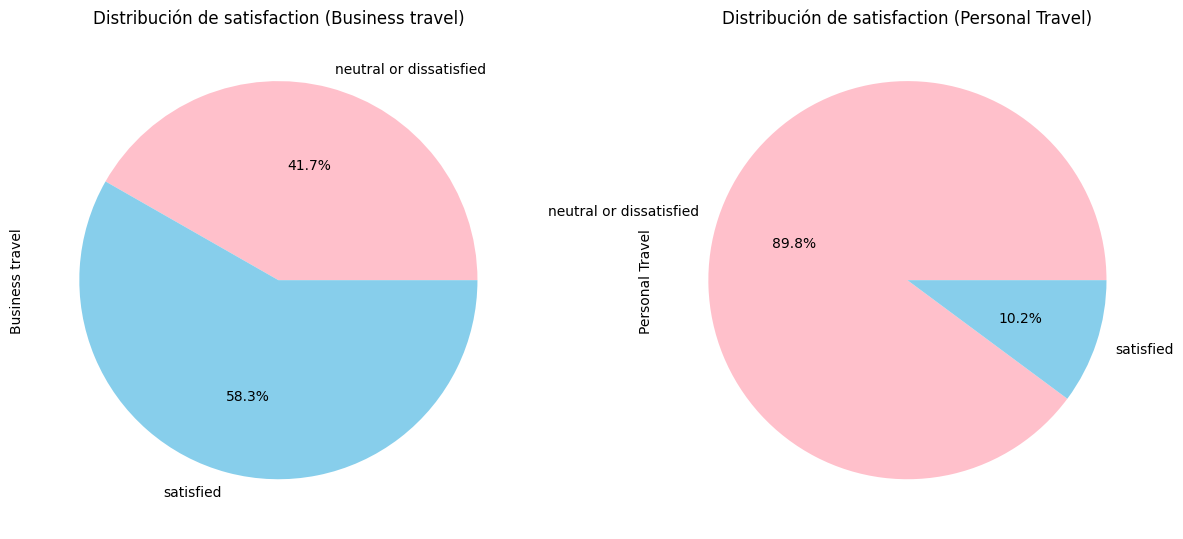

In [66]:
satisfaction_gender = data.groupby(['Type of Travel', 'satisfaction']).size().unstack()
satisfaction_gender
fig, axes = plt.subplots(1, len(satisfaction_gender), figsize=(12, 6))

colors = ["pink", "skyblue"]

for i, (gender, counts) in enumerate(satisfaction_gender.iterrows()):
    counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, ax=axes[i])
    axes[i].set_title(f'Distribución de satisfaction ({gender})')

plt.tight_layout()
plt.show()

female_dissatisfaction = satisfaction_gender.loc['Personal Travel', 'satisfied']
male_dissatisfaction = satisfaction_gender.loc['Business travel', 'satisfied']
difference = female_dissatisfaction - male_dissatisfaction

In [67]:
data['Type of Travel']

0         Personal Travel
1         Business travel
2         Business travel
3         Business travel
4         Business travel
               ...       
103899    Business travel
103900    Business travel
103901    Business travel
103902    Business travel
103903    Business travel
Name: Type of Travel, Length: 103594, dtype: object

In [68]:
data_negocios = df_train[df_train['Type of Travel'] == 'Business Class']
business_class_df = df[df['Class'] == 'Business']

# Calcular la satisfacción promedio para cada servicio
satisfaction_means = business_class_df.groupby('Class').mean().T

# Seleccionar solo las columnas de los servicios
satisfaccion_servicios = satisfaccion_promedio[['Inflight wifi service',
                                                'Departure/Arrival time convenient',
                                                'Ease of Online booking',
                                                'Gate location',
                                                'Food and drink',
                                                'Online boarding',
                                                'Seat comfort',
                                                'Inflight entertainment',
                                                'On-board service',
                                                'Leg room service',
                                                'Baggage handling',
                                                'Checkin service',
                                                'Inflight service',
                                                'Cleanliness']]

# Calcular la satisfacción promedio general para cada servicio
satisfaccion_servicios.mean()
# Ordenar los servicios de acuerdo a la satisfacción promedio
satisfaccion_servicios_mean_sorted = satisfaccion_servicios_mean.sort_values(ascending=False)
#
## Visualizar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=satisfaccion_servicios_mean_sorted.values, y=satisfaccion_servicios_mean_sorted.index, palette='viridis')
plt.title('Satisfacción Promedio de Servicios en la Clase de Negocios')
plt.xlabel('Satisfacción Promedio')
plt.ylabel('Servicio')
plt.show()

## Imprimir los servicios con mayor y menor satisfacción
print("Servicios que satisfacen más a la clase de Negocios:")
print(satisfaccion_servicios_mean_sorted.head(5))
print("\nServicios que dejan más insatisfechos a la clase de Negocios:")
print(satisfaccion_servicios_mean_sorted.tail(5))

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
#Tarea de elian :)

df = pd.DataFrame(data)

# Seleccionar solo las columnas requeridas
selected_columns = [
    'Class',
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
    "satisfaction"
]

df_selected = df[selected_columns]

satisfaction = {'neutral or dissatisfied': 0, 'satisfied': 1}

df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)

# Filtrar solo las filas donde la clase sea "Business"
business_class_df = df_selected[df_selected['Class'] == 'Business']
#
## Calcular el promedio de satisfacción para cada servicio
satisfaction_means = business_class_df.groupby('Class').mean()
satisfaction_means.max()
#satisfaction_correlation = satisfaction_means.abs().sort_values(by='Business',ascending=False)
#satisfaction_correlation

## Ordenar por valor de satisfacción promedio
#satisfaction_means_sorted = satisfaction_means.sort_values(by='Business', ascending=False)
#
#print("Servicios que satisfacen más a la clase Business:")
#print(satisfaction_means_sorted.head())
##
#print("\nServicios que dejan más insatisfechos a la clase Business:")
#print(satisfaction_means_sorted.tail())

<ipython-input-161-0539381e8197>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['satisfaction'] = df_selected['satisfaction'].map(satisfaction)


Inflight wifi service                2.775221
Departure/Arrival time convenient    2.905820
Ease of Online booking               2.914077
Gate location                        2.983042
Food and drink                       3.322835
Online boarding                      3.716411
Seat comfort                         3.760786
Inflight entertainment               3.635395
On-board service                     3.679608
Leg room service                     3.644661
Baggage handling                     3.842812
Checkin service                      3.518987
Inflight service                     3.844447
Cleanliness                          3.477439
satisfaction                         0.694285
dtype: float64

In [ ]:
categories = {
    0: 'Niño (6-11)',
    1: 'Adolescencia (12-18)',
    2: 'Joven (19-26)',
    3: 'Adulto Joven (27-39)',
    4: 'Adulto Medio (40-49)',
    5: 'Adulto Mayor (50-59)',
    6: 'Persona Mayor (>= 60)'
}
extended_data = pd.DataFrame(data)

# Crear la nueva columna 'categoria_edad' usando pd.cut
extended_data['Age Category'] = pd.cut(extended_data['Age'], bins=bins, labels=categories.keys(), right=True).astype(int)

In [70]:
satisfaction_int = {
    'satisfied':1,
    'neutral or dissatisfied':0,
}

# Crear la nueva columna
extended_data['satisfaction int'] = extended_data['satisfaction'].map(satisfaction_int)
extended_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category,satisfaction int
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,Adolescencia,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,Joven,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,3,4,4,4,5,0,0.0,satisfied,Joven,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,Joven,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,4,4,3,3,3,0,0.0,satisfied,Persona Mayor,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,1,4,2,3,2,3,0.0,neutral or dissatisfied,Joven,0
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,4,0,0.0,satisfied,Adulto Medio,1
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,2,4,5,5,4,7,14.0,neutral or dissatisfied,Adulto Joven,0
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,5,1,5,4,1,0,0.0,neutral or dissatisfied,Joven,0


In [ ]:
# Para calcular la correlación entre las columnas de interés:

correlation_matrix = extended_data[['Departure Delay in Minutes', 'Arrival Delay in Minutes', 'satisfaction int']].corr()
correlation_matrix

,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction int
Departure Delay in Minutes,1.000000,0.965481,-0.050515
Arrival Delay in Minutes,0.965481,1.000000,-0.057582
satisfaction int,-0.050515,-0.057582,1.000000


no tienen correlación

In [103]:
#Pregunta 9
#¿Existen correlaciones significativas entre diferentes niveles de satisfacción?
correlation_matrix = extended_data[['Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'satisfaction int']].corr()
correlation_matrix['satisfaction int']

Inflight wifi service                0.284163
Departure/Arrival time convenient   -0.051718
Ease of Online booking               0.171507
Gate location                        0.000449
Food and drink                       0.209659
Online boarding                      0.503447
Seat comfort                         0.349112
Inflight entertainment               0.398203
On-board service                     0.322450
Leg room service                     0.313182
Baggage handling                     0.247819
Checkin service                      0.235914
Inflight service                     0.244852
Cleanliness                          0.305050
satisfaction int                     1.000000
Name: satisfaction int, dtype: float64

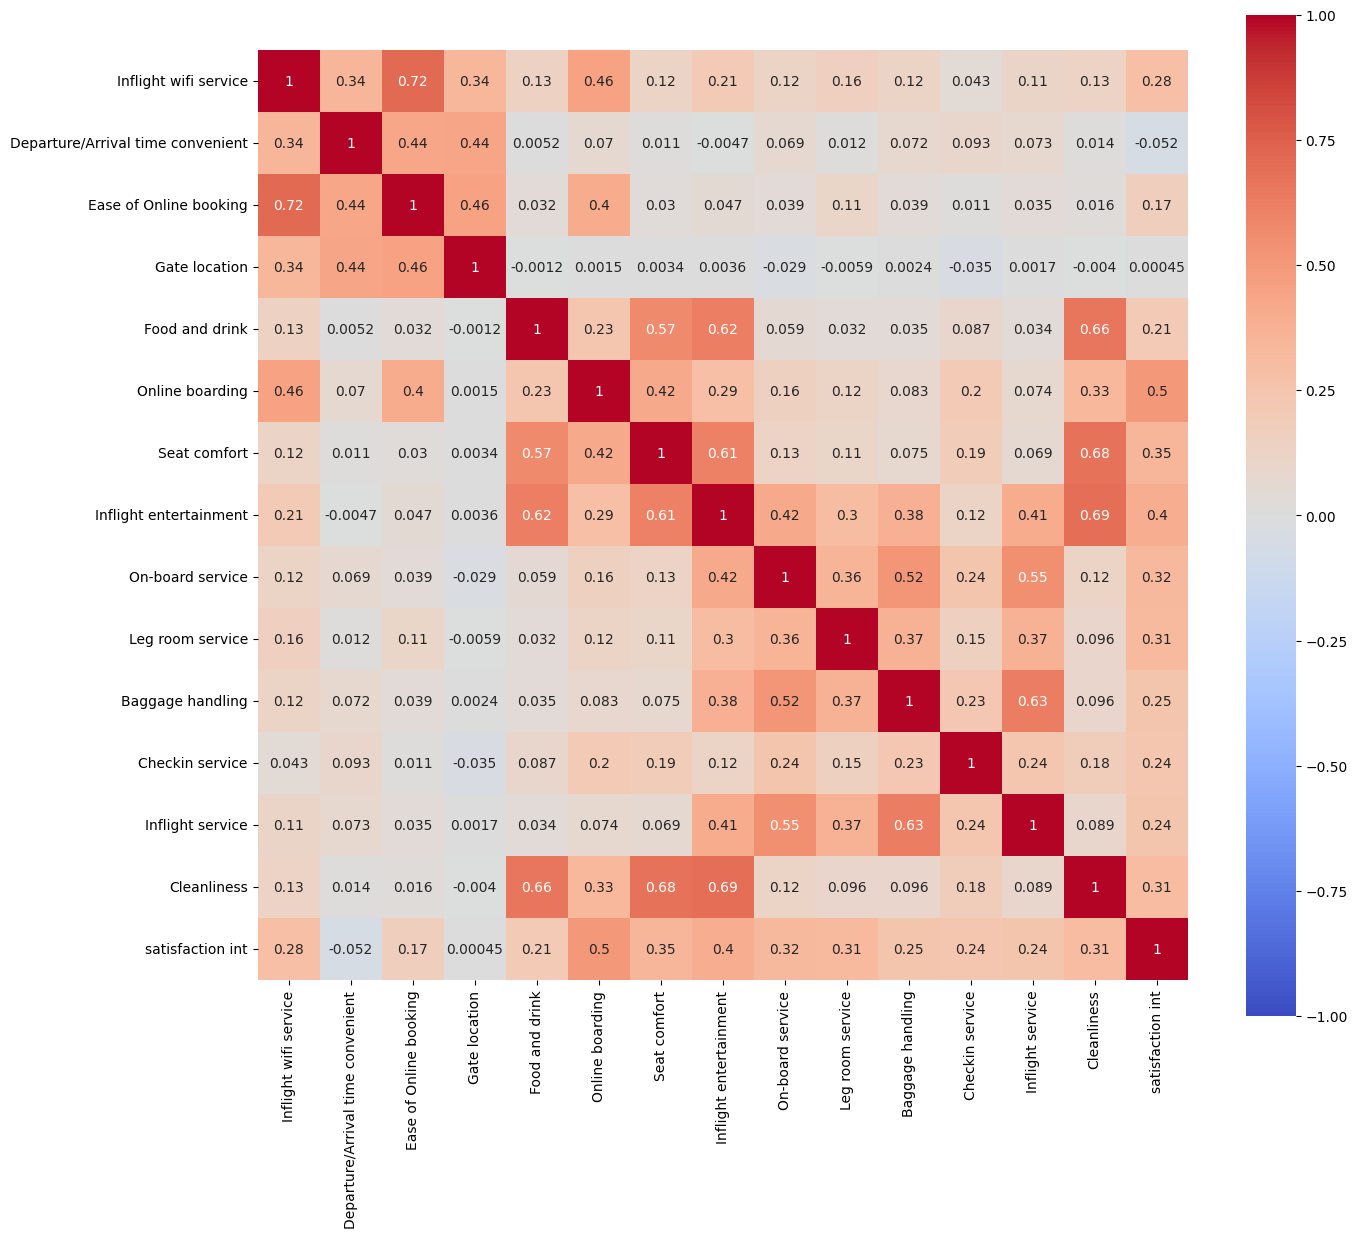

In [76]:
plt.figure(figsize=(15, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, square=True)

# Muestra el gráfico
plt.show()

In [ ]:
#Pregunta 10
#10.¿Qué segmentos de clientes existen en base a demografía, tipo de cliente, tipo de viaje y clase?,¿cuáles muestran mayores niveles de satisfacción? 

In [78]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

client_type_int = {
    'Loyal Customer':1,
    'disloyal Customer':0,
}
type_travel_int = {
    'Personal Travel':1,
    'Business travel':0,
}
class_int = {
    'Eco Plus':1,
    'Business':0,
    'Eco': 2
}

# Crear la nueva columna
extended_data['Customer Type int'] = extended_data['Customer Type'].map(client_type_int)
extended_data['Type of Travel int'] = extended_data['Type of Travel'].map(type_travel_int)
extended_data['Class int'] = extended_data['Class'].map(class_int)
extended_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category,satisfaction int,Customer Type int,Type of Travel int,Class int
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,25,18.0,neutral or dissatisfied,Adolescencia,0,1,1,1
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,4,1,1,6.0,neutral or dissatisfied,Joven,0,0,0,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,4,5,0,0.0,satisfied,Joven,1,1,0,0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,4,2,11,9.0,neutral or dissatisfied,Joven,0,1,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,0,0.0,satisfied,Persona Mayor,1,1,0,0


c:\Users\ddcre\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


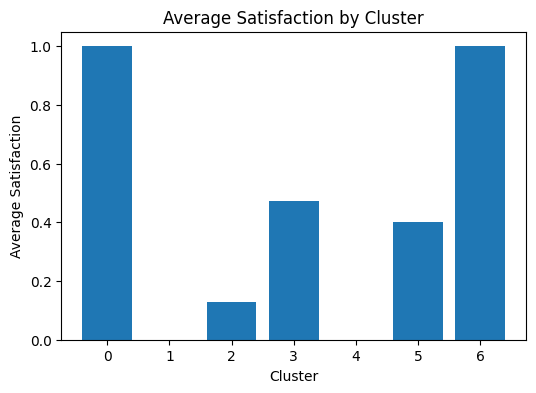

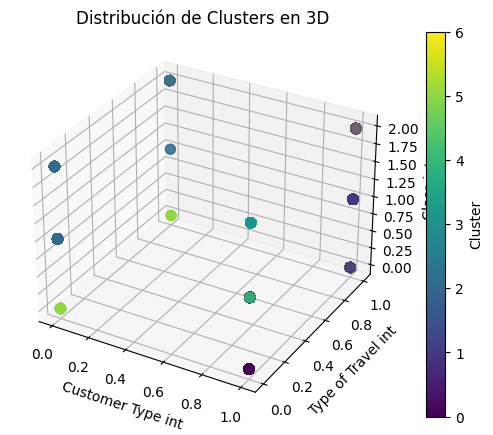

In [101]:
from mpl_toolkits.mplot3d import Axes3D

features = ['Customer Type int', 'Type of Travel int', 'Class int', 'satisfaction int']
data_selected = extended_data[features]

# Estandarización de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Aplicar k-means para clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(data_scaled)
extended_data['Cluster'] = kmeans.labels_

# Calcular la media de satisfacción para cada cluster
satisfaction_means = extended_data.groupby('Cluster')['satisfaction int'].mean()

# Visualización de la media de satisfacción por cluster
plt.figure(figsize=(6,4))
plt.bar(range(len(satisfaction_means)), satisfaction_means)
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction by Cluster')
plt.xticks(range(len(satisfaction_means)), satisfaction_means.index)
plt.show()

# Visualización de la distribución de los puntos en un gráfico 3D
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')

# Seleccionar tres características para el gráfico 3D
x_feature = 'Customer Type int'
y_feature = 'Type of Travel int'
z_feature = 'Class int'

# Crear el scatter plot 3D
sc = ax.scatter(extended_data[x_feature], extended_data[y_feature], extended_data[z_feature],
                c=extended_data['Cluster'], cmap='viridis', s=50)

# Etiquetas y título
ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('Distribución de Clusters en 3D')

# Barra de color para los clusters
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Cluster')

plt.show()

In [102]:
cluster_0_data = extended_data[extended_data['Cluster'] == 0]
cluster_1_data = extended_data[extended_data['Cluster'] == 1]
cluster_2_data = extended_data[extended_data['Cluster'] == 2]

cluster_0_data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Age Category,satisfaction int,Customer Type int,Type of Travel int,Class int,Cluster
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,0,0.0,satisfied,Joven,1,1,0,0,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,0,0.0,satisfied,Persona Mayor,1,1,0,0,0
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,...,4,4,0.0,satisfied,Adulto Mayor,1,1,0,0,0
16,Female,Loyal Customer,26,Business travel,Business,2123,3,3,3,3,...,4,49,51.0,satisfied,Joven,1,1,0,0,0
17,Male,Loyal Customer,41,Business travel,Business,2075,4,4,2,4,...,5,0,10.0,satisfied,Adulto Medio,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103890,Female,Loyal Customer,56,Business travel,Eco Plus,550,3,5,5,5,...,3,0,0.0,satisfied,Adulto Mayor,1,1,0,1,0
103891,Male,Loyal Customer,54,Business travel,Business,1991,5,5,5,5,...,4,35,31.0,satisfied,Adulto Mayor,1,1,0,0,0
103894,Male,Loyal Customer,26,Business travel,Business,712,4,4,4,4,...,5,17,26.0,satisfied,Joven,1,1,0,0,0
103897,Female,Loyal Customer,60,Business travel,Business,1599,5,5,5,5,...,4,9,7.0,satisfied,Persona Mayor,1,1,0,0,0


c:\Users\ddcre\anaconda3\envs\tensorenviron\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


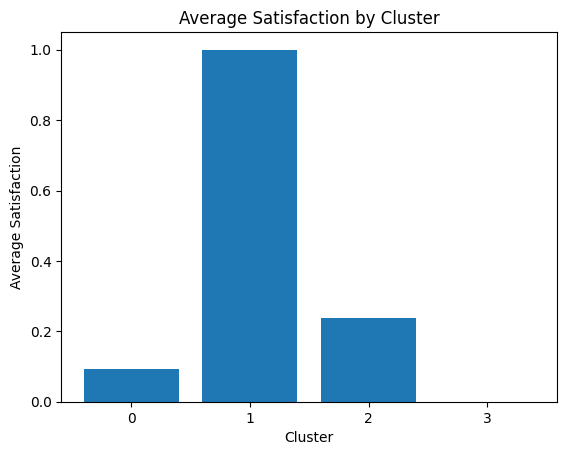

In [84]:
# Selección de características relevantes
features = ['Customer Type int', 'Type of Travel int', 'Class int', 'satisfaction int']
data_selected = extended_data[features]

# Estandarización de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
extended_data['Cluster'] = kmeans.labels_

satisfaction_means = extended_data.groupby('Cluster')['satisfaction int'].mean()

# Visualización de la media de satisfacción por cluster
plt.bar(range(len(satisfaction_means)), satisfaction_means)
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction by Cluster')
plt.xticks(range(len(satisfaction_means)), satisfaction_means.index)
plt.show()

In [ ]:


# Suponiendo que 'data' es tu DataFrame con las características relevantes



# Aplicar k-means para clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_scaled)
data['Cluster'] = kmeans.labels_

# Calcular la media de satisfacción para cada cluster
satisfaction_means = data.groupby('Cluster')['satisfaction int'].mean()

# Visualización de la media de satisfacción por cluster
plt.bar(range(len(satisfaction_means)), satisfaction_means)
plt.xlabel('Cluster')
plt.ylabel('Average Satisfaction')
plt.title('Average Satisfaction by Cluster')
plt.xticks(range(len(satisfaction_means)), satisfaction_means.index)
plt.show()

In [86]:
satisfied_customer_type_group = extended_data[extended_data['satisfaction int'] == 1]['Customer Type']
satisfied_type_travel_group = extended_data[extended_data['satisfaction int'] == 1]['Type of Travel'].size
satisfied_class_group = extended_data[extended_data['satisfaction int'] == 1]['Class'].size
satisfied_customer_type_group

2         Loyal Customer
4         Loyal Customer
7         Loyal Customer
13        Loyal Customer
16        Loyal Customer
               ...      
103890    Loyal Customer
103891    Loyal Customer
103894    Loyal Customer
103897    Loyal Customer
103900    Loyal Customer
Name: Customer Type, Length: 44897, dtype: object

In [ ]:
new_df = pd.Series({'Customer Type':satisfied_type_travel_group, 'Type of Travel':satisfied_type_travel_group, 'Class': satisfied_class_group})
new_df

Customer Type     44897
Type of Travel    44897
Class             44897
dtype: int64

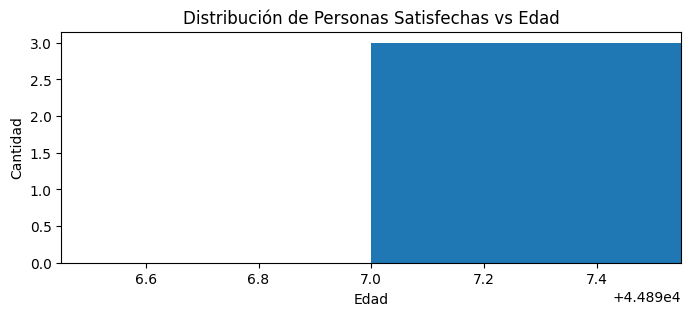

In [ ]:
bins = list(range(0,100,2))

#Histograma de personas satisfechos según la edad
plt.figure(figsize=(8, 3))
new_df.plot(kind="hist", width=1);
plt.title("Distribución de Personas Satisfechas vs Edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()
